In [69]:
%matplotlib inline
import sys,pdb
import math


def usage():
  print >> sys.stderr,"""usage: python holidays_map.py resultfile.dat

Where resultfile.dat is a textfile. Its format is:

result_file = ( result_line newline )*

# each line is a query image with associated results
result_line = query_image_name query_result*

# a query result is a pair: the result's filename is prefixed with its rank (0 based)
query_result = rank result_image_name 

Where:
- all items are separated by whitespaces (space or tab)
- image names are like 12345.jpg (case sensitive)
- the order of queries is not relevant
- if the query image is ranked, it is ignored in the scoring

Copyright INRIA 2008. License: GPL
"""
  sys.exit(1)



def score_ap_from_ranks_1 (ranks, nres):
  """ Compute the average precision of one search.
  ranks = ordered list of ranks of true positives
  nres  = total number of positives in dataset  
  """
  
  # accumulate trapezoids in PR-plot
  ap=0.0

  # All have an x-size of:
  recall_step=1.0/nres
    
  for ntp,rank in enumerate(ranks):
      
    # y-size on left side of trapezoid:
    # ntp = nb of true positives so far
    # rank = nb of retrieved items so far
    if rank==0: precision_0=1.0
    else:       precision_0=ntp/float(rank)

    # y-size on right side of trapezoid:
    # ntp and rank are increased by one
    precision_1=(ntp+1)/float(rank+1)
    print "ntp"
    print ntp
    print "rank"
    print rank
    
    ap+=(precision_1+precision_0)*recall_step/2.0
        
  return ap

  
def get_groundtruth():
  """ Read datafile holidays_images.dat and output a dictionary
  mapping queries to the set of positive results (plus a list of all
  images)"""
  gt={}
  allnames=set()
  k = 0 
  for line in open("all_data.dat","r"):
    k = k + 1
    imname=line.strip()
    allnames.add(imname)
    imno=int(imname[:-len(".jpg")])
    actclass = math.ceil(imno / 100)
    actclass = int(actclass)
    actclassval = actclass
    insclass = str(actclass) + ".jpg"
    print insclass
    if k%80 == 1:  
        gt_results=set()
        gt[insclass]=gt_results
        gt_results.add(imname)  
    else:
        gt_results.add(imname)
  return (allnames,gt)

def print_perfect():
  " make a perfect result file "
  (allnames,gt)=get_groundtruth()
  for qname,results in gt.iteritems():
    print qname,
    for rank,resname in enumerate(results):
      print rank,resname,
    print

def parse_results(fname):
  """ go through the results file and return them in suitable
  structures"""
  for l in open(fname,"r"):
    fields=l.split()
    print fields
    query_name=fields[0]
    ranks=[int(rank) for rank in fields[1::2]]
    yield (query_name,zip(ranks,fields[2::2]))


#########################################################################
# main program

#if len(sys.argv)!=2: usage()

infilename='C:\\Users\\Subhankari\\Desktop\\desktop_as_on_13th_april\\text books\\ML\\project\\ImageRetrieval\\Notebook\\eval_holidays\\result_data.dat';#sys.argv[1]

(allnames,gt)=get_groundtruth()
#print "allnames"
#print allnames
#print "gt"
print gt

# sum of average precisions
sum_ap=0.
# nb of images so far
n=0

# loop over result lines
for query_name,results in parse_results(infilename):
    
    qryno=int(query_name[:-len(".jpg")])
    qryclass = math.ceil(qryno / 100)
    qryclass = int(qryclass)
    insclass = str(qryclass) + ".jpg"
    print insclass
    flag = 0
    if insclass not in gt:
        print "unknown query ",query_name
        flag = 1
        #sys.exit(1)

    # sort results by increasing rank
    results.sort()
    
#qryno=int(query_name[:-len(".jpg")])
  #qryclass = math.ceil(qryno / 134)
  # ground truth
    if flag != 1:
        gt_results=gt.pop(insclass)
    

      # ranks of true positives (not including the query)
        tp_ranks=[]

      # apply this shift to ignore null results
        rank_shift=0

        for rank,returned_name in results:

          if returned_name not in allnames:
            print "image name %s not in Holidays"%returned_name
            sys.exit(1)

          if returned_name==query_name:
            rank_shift=-1

          elif returned_name in gt_results:
            tp_ranks.append(rank+rank_shift)
            print tp_ranks

        sum_ap+=score_ap_from_ranks_1(tp_ranks,len(gt_results))
        n+=1

"""
if gt:
  # some queries left
  print "no result for queries",gt.keys()
  sys.exit(1)
"""
print "mAP for %s: %.5f"%(infilename,sum_ap/n)



0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
0.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jpg
1.jp

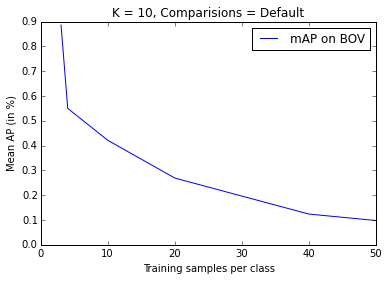

In [63]:
v = [3,4,10,20,40,50]
mAP = [0.886,0.55,0.421,0.269,0.124,0.098]
import matplotlib.pyplot as plt
plt.plot(v, mAP, linestyle="-",label = 'mAP on BOV')
plt.xlabel("Training samples per class")
plt.ylabel("Mean AP (in %)")
plt.title("K = 10, Comparisions = Default")

plt.legend(loc='upper right')
plt.show()



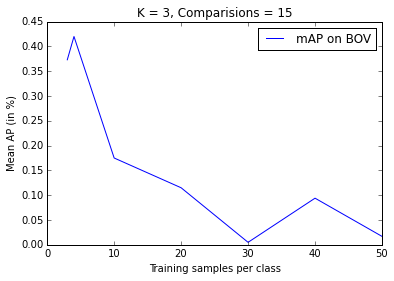

In [70]:
v = [3,4,10,20,30,40,50]
mAP = [0.373,0.42,0.175,0.115,0.005,0.094,0.017]
import matplotlib.pyplot as plt
plt.plot(v, mAP, linestyle="-",label = 'mAP on BOV')
plt.xlabel("Training samples per class")
plt.ylabel("Mean AP (in %)")
plt.title("K = 3, Comparisions = 15")

plt.legend(loc='upper right')
plt.show()